#### CITATION: Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.
#### This is an analysis of the Adult dataset from UCI Irvine ML datasets by Ushasri Bhogaraju, in Python. I have used the Pandas, numpy, matplotlib, scikit-learn and seaborn libraries. The purpose of the analysis is to train the RandomForest model as a binary classifer, with 'adult.data' dataset and then classify the outcome variable 'salary' as >50K or <=50K in the test dataset, 'adult.test'. 

In [30]:
# there is '?' in place of missing values in both training and test datasets.  
# There is a leading space before each data element.
# test data set has an extra period in the salary column. 

#Loading and examining the dataset
import pandas as pd
file_path = 'adult.data'

df = pd.read_csv(file_path, header=None,  na_values=' ?', skipinitialspace=True)

#This reveals that there are no column names incorporated in the adult.data file

#reading column names from adult.names file and incorporating the names = column_names attribute while reading the file into a dataframe
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
                  "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]
df = pd.read_csv(file_path, header=None, names=column_names, na_values=' ?', skipinitialspace=True)
df
print(df.shape)
df

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [31]:
#Examining the dataframe further to see if any datatype changes are required
print(df.columns) #column names have hyphens not underscores
print(df.isnull().sum()) # Null values are replaced with ? in the dataset already
print(df.dtypes) #All datatypes are correct

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object


In [32]:
# Summary of the dataframe
print(df.info()) #15 variables, 32560 observations

# Summary statistics of numerical columns
print(df.describe())

# Summary statistics of categorical columns
print(df['salary'].value_counts()) #24,720 obs with <50K salary in training data and 7841 obs with >50K salary
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  3

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
#Data cleaning steps
# Checking for missing values, shape before elimination of nulls and duplicates
print(df.isnull().sum())
print(df.shape)

# Dropping nulls (there are no nulls)
df = df.dropna()  
print(df.shape)

# Removing duplicates
df = df.drop_duplicates() #There are 24 duplicate observations, removed

print(df.shape)

df

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64
(32561, 15)
(32561, 15)
(32537, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


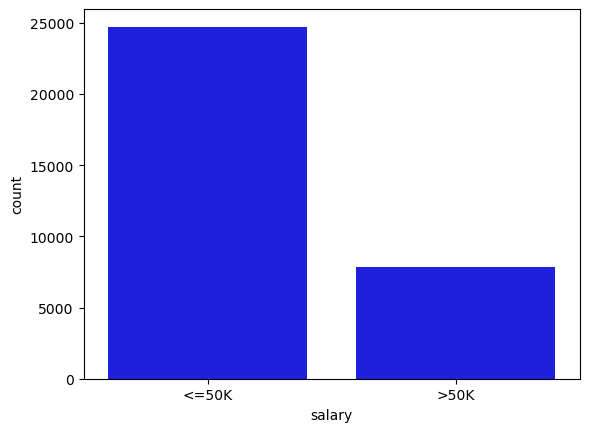

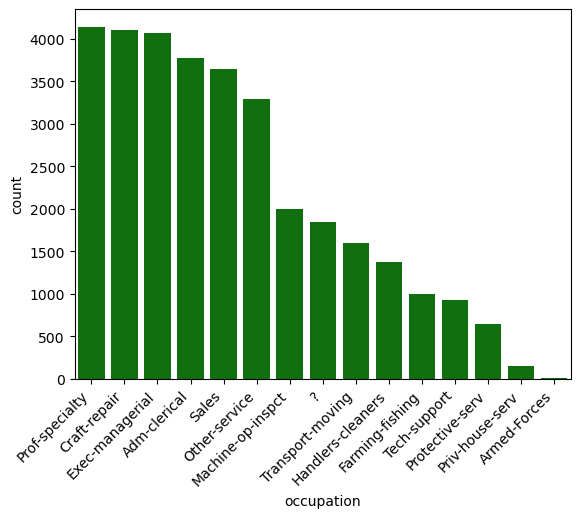

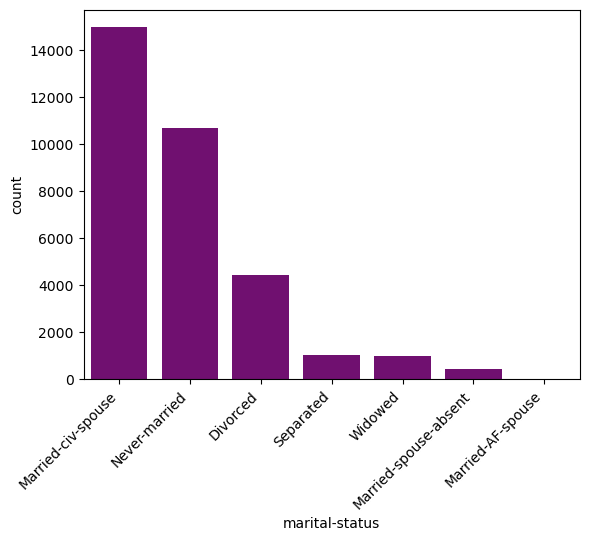

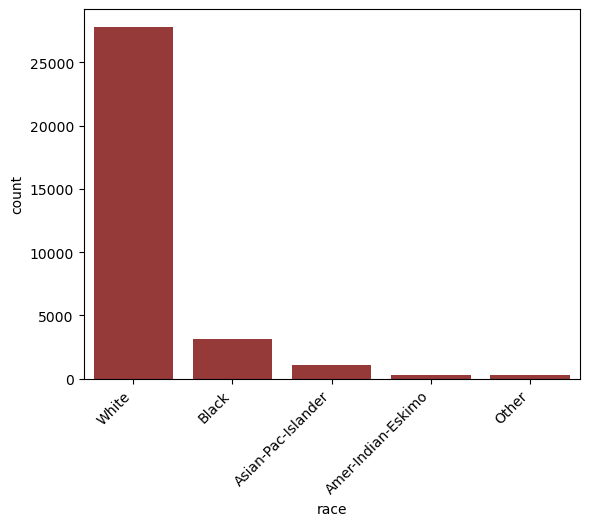

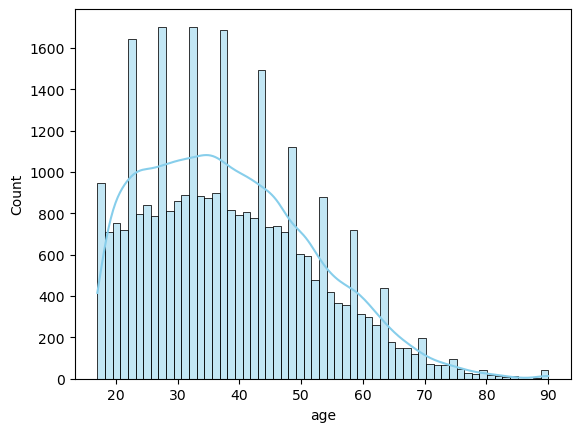

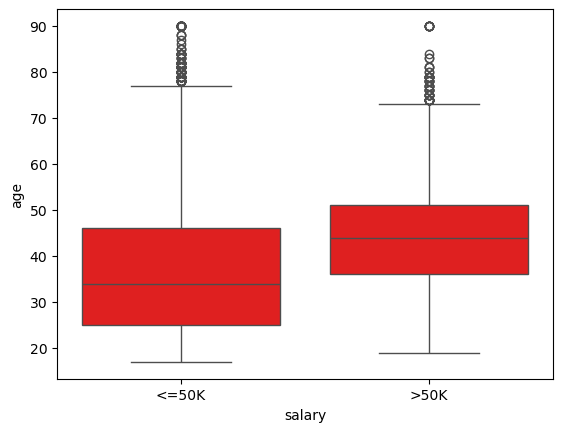

In [33]:
#EDA (exploratory data analysis)
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distribution of the target variable
sns.countplot(x='salary', data=df, color = 'blue')
plt.show() #Confirms the count as 28740 for <=50K salary individuals

# Plotting distribution of occupation variable
occupation_order = df['occupation'].value_counts().index
sns.countplot(x='occupation', data=df, order= occupation_order, color = 'green')
plt.xticks(rotation=45,ha= 'right')
plt.show()

# Plotting distribution of marital-status
marital_status_order = df['marital-status'].value_counts().index
sns.countplot(x='marital-status', data=df, order=marital_status_order,  color = 'purple')
plt.xticks(rotation=45, ha='right')
plt.show()

#Plotting race
race_order = df['race'].value_counts().index
sns.countplot(x='race', data =df, order=race_order, color = 'brown')
plt.xticks(rotation=45, ha = 'right')
plt.show()

# Plotting the distribution of a numerical column with kernel density estimation parameter to provide a smooth probability density curve
sns.histplot(df['age'], kde=True, color = 'skyblue')
plt.show()

# Plotting relationship between numerical columns and target variable
sns.boxplot(x='salary', y='age', data=df, color='red')
plt.show()


In [34]:
# Data transformation, encoding categorical variables, scaling numerical features

df # checking dataframe , training dataset adult.data, after data cleaning

# Encoding categorical variables in the training dataset
df = pd.get_dummies(df, columns=["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"], drop_first=True)

# Encoding the target variable in the training dataset
df["salary"] = df["salary"].apply(lambda x: 1 if x == ">50K" else 0)

# Separating features and target variable
#Loading the encoded dataframe, without the outcome variable column 'salary' into the dataframe X
adult_train = df.drop("salary", axis=1)

#Loading only the target variable column'salary'
adult_train_sal_col = df["salary"]

# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
adult_train = pd.DataFrame(scaler.fit_transform(adult_train), columns=adult_train.columns)


In [35]:
#Preparing the test dataset given separately in the adult dataset 
file_path_testdata = 'adult.test'
adult_test = pd.read_csv(file_path_testdata, header=None, names=column_names, na_values=' ?', skipinitialspace=True)

# salary column in the test dataset has a period after >50K and <=50K, removing it from salary column
adult_test['salary'] = adult_test['salary'].str[:-1]
adult_test

adult_test = adult_test.dropna()
adult_test = adult_test.drop_duplicates()
adult_test

#Encoding categorical variables in the test dataset
adult_test = pd.get_dummies(adult_test, columns=["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"], drop_first=True)
adult_test["salary"] = adult_test["salary"].apply(lambda x: 1 if x == ">50K" else 0)

#Storing the index of the encoded train dataset in a variable for checking if they match with the test dataset later
adult_train_columns = adult_train.columns
print(adult_train_columns)

adult_test_sal_col = adult_test["salary"]
adult_test = adult_test.drop("salary", axis=1)

#If there are missing columns in the test data (ex:Holand-Netherlands) add a column with 0s in its place (encoding issue)

for col in adult_train_columns:
    if col not in adult_test.columns:
        adult_test[col] = 0

#Ensuring that the columns in the test dataset are in the same order as the train dataset
adult_test = adult_test[adult_train_columns]

# Scaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
adult_test = pd.DataFrame(scaler.fit_transform(adult_test), columns=adult_test.columns)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupa

In [ ]:
X_train= adult_train, y_train = adult_train_sal_col ; X_test = adult_test, y_test = adult_test_sal_col

In [36]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Training a Random Forest classifier
model = RandomForestClassifier(random_state=42)

#Fitting the model with encoded adult.data without outcome variable (adult_train) and the dataframe with only the outcome variable adult_train_sal_col)
model.fit(adult_train, adult_train_sal_col)

# Predict on the test set
adult_sal_col_pred = model.predict(adult_test)

# Evaluate the model
accuracy = accuracy_score(adult_test_sal_col, adult_sal_col_pred )
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(adult_test_sal_col, adult_sal_col_pred))

print("Confusion Matrix:")
print(confusion_matrix(adult_test_sal_col, adult_sal_col_pred))


Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12430
           1       0.72      0.60      0.65      3846

    accuracy                           0.85     16276
   macro avg       0.80      0.76      0.78     16276
weighted avg       0.84      0.85      0.84     16276

Confusion Matrix:
[[11524   906]
 [ 1548  2298]]


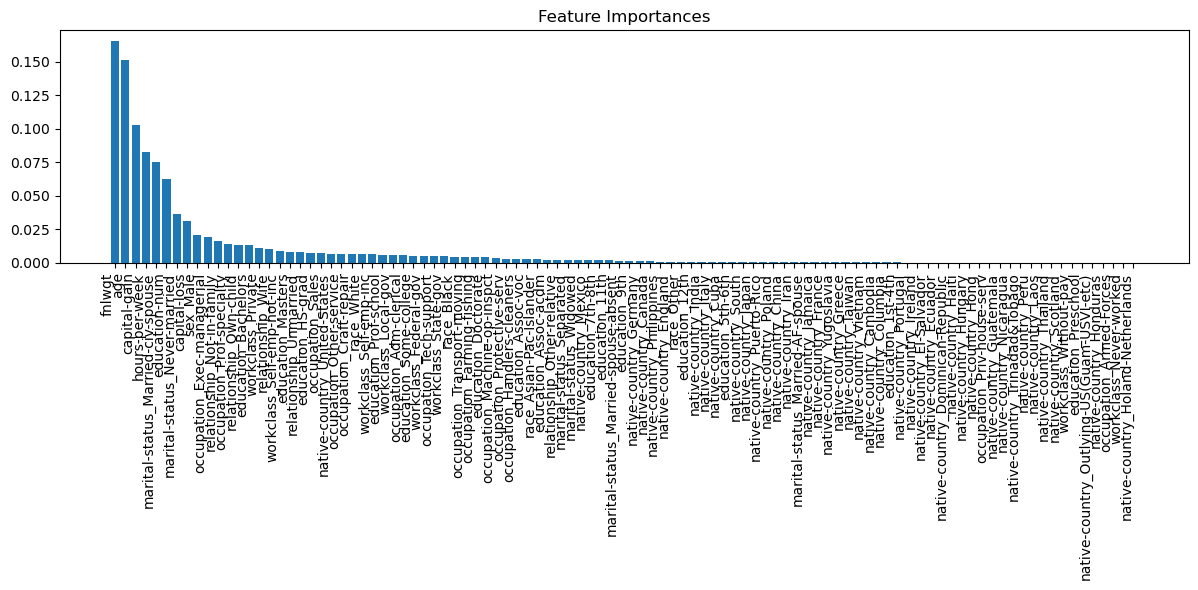

The model achieved an accuracy of 0.85 on the test set.


In [39]:
import numpy as np
# Plotting feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = adult_train.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(adult_train.shape[1]), importances[indices], align="center")
plt.xticks(range(adult_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

# Summarizing findings
print(f"The model achieved an accuracy of {accuracy:.2f} on the test set.")
